In [6]:
import pandas as pd

# '1_1.csv' 파일을 'euc-kr' 인코딩으로 읽어서 DataFrame으로 저장
df = pd.read_csv('1_1.csv', encoding='euc-kr')

# 데이터프레임 내용 출력
print(df)


        No 프로젝트번호  출도부서     과제번호        도면명        출도일자             출도번호  \
0        1     P1   D12  DPT4001   DNAME263  2023-11-06  DPT400120231106   
1        2     P1   D12  DPT4002   DNAME268  2023-11-13  DPT400220231113   
2        3     P1   D12  DPT4003   DNAME268  2023-11-13  DPT400320231113   
3        4     P1   D12  DPT4004   DNAME268  2023-11-13  DPT400420231113   
4        5     P1   D12  DPT3982   DNAME267  2023-11-13  DPT398220231113   
...    ...    ...   ...      ...        ...         ...              ...   
5256  5260     P1   D13  DPT4719  DNAME1826  2027-03-27  DPT471920270327   
5257  5261     P1   D13  DPT4719  DNAME1826  2027-03-27  DPT471920270327   
5258  5262     P1   D13  DPT4719  DNAME1826  2027-03-27  DPT471920270327   
5259  5263     P1   D13  DPT4719  DNAME1826  2027-03-27  DPT471920270327   
5260  5264     P1  D128  DPT3441    DNAME38  2027-03-28  DPT344120270328   

      근원부서 원인코드      코드명  
0      NaN  R14  RNAME10  
1      NaN   R1  RNAME20  
2     

In [7]:
import pandas as pd

# '1_1.csv' 파일을 읽어서 DataFrame으로 저장
df = pd.read_csv('1_1.csv', encoding='euc-kr')  # 인코딩은 파일에 맞게 조정

# 컬럼 이름만 추출
columns = df.columns.tolist()

# 컬럼 이름 출력
print(columns)


['No', '프로젝트번호', '출도부서', '과제번호', '도면명', '출도일자', '출도번호', '근원부서', '원인코드', '코드명']


In [1]:
import pandas as pd

# CSV 파일을 읽어서 DataFrame으로 저장 (필요한 인코딩으로 조정)
df = pd.read_csv('1_1.csv', encoding='euc-kr')

# 1. 부서별 출도 패턴 분석
# 출도부서별 출도 요청 횟수 카운트
dept_issue_count = df['출도부서'].value_counts()
print("부서별 출도 요청 횟수:")
print(dept_issue_count)

# 출도일자를 datetime 형식으로 변환 후, 부서별 출도 요청의 시간 변화 분석
df['출도일자'] = pd.to_datetime(df['출도일자'])
dept_issue_trend = df.groupby(['출도부서', df['출도일자'].dt.to_period('M')]).size().unstack(fill_value=0)
print("\n부서별 월별 출도 요청 횟수 변화:")
print(dept_issue_trend)




부서별 출도 요청 횟수:
출도부서
D32     2420
D25      755
D170     366
D348     324
D88      187
D128     172
D343     109
D7       103
D338      89
D22       70
D33       70
D12       65
D13       64
D329      57
D344      56
D31       49
D230      38
D231      35
D236      27
D78       25
D281      22
D232      14
D346      13
D235      13
D113      13
D28       12
D114      11
D240      11
D228      10
D260       9
D336       8
D239       8
D316       5
D224       4
D327       3
D333       3
D292       3
D245       3
D225       2
D40        2
D72        2
D115       2
D340       2
D223       1
D112       1
D140       1
D349       1
D309       1
Name: count, dtype: int64

부서별 월별 출도 요청 횟수 변화:
출도일자  2023-11  2023-12  2024-01  2024-02  2024-03  2024-04  2024-05  2024-06  \
출도부서                                                                           
D112        0        0        0        0        0        0        0        0   
D113        0        0        0        0        0        0        0   

In [8]:
# 부서별 월별 출도 요청 횟수의 평균 계산
# dept_issue_avg = dept_issue_trend.mean(axis=1)
dept_issue_avg_sorted = dept_issue_avg.sort_values(ascending=False)
# print("\n부서별 월별 출도 요청 횟수의 평균:")
# print(dept_issue_avg)
print("\n부서별 월별 출도 요청 횟수의 평균 (내림차순 정렬):")
print(dept_issue_avg_sorted)


부서별 월별 출도 요청 횟수의 평균 (내림차순 정렬):
출도부서
D32     62.051282
D25     19.358974
D170     9.384615
D348     8.307692
D88      4.794872
D128     4.410256
D343     2.794872
D7       2.641026
D338     2.282051
D33      1.794872
D22      1.794872
D12      1.666667
D13      1.641026
D329     1.461538
D344     1.435897
D31      1.256410
D230     0.974359
D231     0.897436
D236     0.692308
D78      0.641026
D281     0.564103
D232     0.358974
D346     0.333333
D235     0.333333
D113     0.333333
D28      0.307692
D240     0.282051
D114     0.282051
D228     0.256410
D260     0.230769
D336     0.205128
D239     0.205128
D316     0.128205
D224     0.102564
D292     0.076923
D245     0.076923
D333     0.076923
D327     0.076923
D115     0.051282
D225     0.051282
D72      0.051282
D40      0.051282
D340     0.051282
D112     0.025641
D223     0.025641
D140     0.025641
D309     0.025641
D349     0.025641
dtype: float64


In [3]:
import pandas as pd

# 2. 문제 발생 원인 분석
# 근원부서별 문제 발생 횟수 카운트
issue_by_dept = df['근원부서'].value_counts()
print("\n근원부서별 문제 발생 횟수:")
print(issue_by_dept)

# 원인코드별 문제 발생 횟수 카운트
issue_by_code = df['원인코드'].value_counts()
print("\n원인코드별 문제 발생 횟수:")
print(issue_by_code)

# 근원부서와 원인코드별 문제 발생 카운트
issue_by_dept_code = df.groupby(['근원부서', '원인코드']).size().unstack(fill_value=0)
print("\n근원부서와 원인코드별 문제 발생 횟수:")
print(issue_by_dept_code)


근원부서별 문제 발생 횟수:
근원부서
D348    328
D344    295
D113    236
D346     60
D239     59
D342     50
D255     24
D115      2
D88       1
D254      1
Name: count, dtype: int64

원인코드별 문제 발생 횟수:
원인코드
R15    2465
R1      700
R5      356
R12     323
R2      300
R17     210
R4      209
R16     208
R14     197
R3      158
R13      65
R7       35
R11      15
R19       9
R8        4
R9        3
R10       2
R18       1
R6        1
Name: count, dtype: int64

근원부서와 원인코드별 문제 발생 횟수:
원인코드  R13  R15  R2  R12  R7  R16  R17  R3  R1  R14  R5  R10  R18  R4  R8  R9
근원부서                                                                        
D113   60  176   0    0   0    0    0   0   0    0   0    0    0   0   0   0
D115    0    0   2    0   0    0    0   0   0    0   0    0    0   0   0   0
D239    0    0   1   57   1    0    0   0   0    0   0    0    0   0   0   0
D254    0    0   0    0   0    1    0   0   0    0   0    0    0   0   0   0
D255    0    0   0    0   0    0   24   0   0    0   0    0    0   0   

In [2]:
import pandas as pd

# 3. 도면 관리와 출도 이력
# 도면명별 출도 횟수 카운트
drawing_issue_count = df['도면명'].value_counts()
print("\n도면명별 출도 횟수:")
print(drawing_issue_count)

# 특정 도면의 출도 이력 확인 (예시: '도면명'이 'A도면'인 경우)
specific_drawing_history = df[df['도면명'] == 'A도면'][['출도일자', '출도번호']]
print("\n'A도면'의 출도 이력:")
print(specific_drawing_history)


도면명별 출도 횟수:
도면명
DNAME137    262
DNAME93     191
DNAME325    138
DNAME89     115
DNAME172    104
           ... 
DNAME33       1
DNAME183      1
DNAME29       1
DNAME215      1
DNAME276      1
Name: count, Length: 528, dtype: int64

'A도면'의 출도 이력:
Empty DataFrame
Columns: [출도일자, 출도번호]
Index: []


In [4]:
import pandas as pd

# CSV 파일을 읽어서 DataFrame으로 저장 (필요한 인코딩으로 조정)
df = pd.read_csv('1_1.csv', encoding='euc-kr')

# 1. 프로젝트별 과제 수 분석
# 프로젝트번호별로 과제번호의 개수를 세어, 프로젝트별 과제 수를 파악
project_task_count = df.groupby('프로젝트번호')['과제번호'].nunique()
print("프로젝트별 과제 수:")
print(project_task_count)

# 2. 각 프로젝트 내 과제별 진행 상황 분석 (예: 출도일자를 통해 과제 진행상황 유추)
# 여기서는 출도일자가 있는 경우 '진행 중', 없는 경우 '완료'로 가정
df['진행상황'] = df['출도일자'].apply(lambda x: '진행 중' if pd.notna(x) else '완료')
project_task_status = df.groupby(['프로젝트번호', '과제번호'])['진행상황'].unique().unstack(fill_value='정보 없음')
print("\n프로젝트 내 과제별 진행 상황:")
print(project_task_status)

# 3. 각 프로젝트의 전체 진행 상황
# 프로젝트별 '진행 중' 과제 수와 '완료' 과제 수 카운트
project_overall_status = df.groupby(['프로젝트번호', '진행상황']).size().unstack(fill_value=0)
print("\n프로젝트별 전체 과제 진행 상황:")
print(project_overall_status)

# 4. 특정 프로젝트의 상세 과제 진행 상황 (예: '프로젝트번호'가 'P123'인 경우)
specific_project_status = df[df['프로젝트번호'] == 'P123'][['과제번호', '진행상황']]
print("\n'프로젝트 P123'의 상세 과제 진행 상황:")
print(specific_project_status)


프로젝트별 과제 수:
프로젝트번호
P1    3371
Name: 과제번호, dtype: int64

프로젝트 내 과제별 진행 상황:
과제번호    DPT100 DPT1000 DPT1001 DPT1002 DPT1003 DPT1004 DPT1005 DPT1006  \
프로젝트번호                                                                   
P1      [진행 중]  [진행 중]  [진행 중]  [진행 중]  [진행 중]  [진행 중]  [진행 중]  [진행 중]   

과제번호   DPT1007 DPT1008  ...  DPT990  DPT991  DPT992  DPT993  DPT994  DPT995  \
프로젝트번호                  ...                                                   
P1      [진행 중]  [진행 중]  ...  [진행 중]  [진행 중]  [진행 중]  [진행 중]  [진행 중]  [진행 중]   

과제번호    DPT996  DPT997  DPT998  DPT999  
프로젝트번호                                  
P1      [진행 중]  [진행 중]  [진행 중]  [진행 중]  

[1 rows x 3371 columns]

프로젝트별 전체 과제 진행 상황:
진행상황    진행 중
프로젝트번호      
P1      5261

'프로젝트 P123'의 상세 과제 진행 상황:
Empty DataFrame
Columns: [과제번호, 진행상황]
Index: []


C:\Users\samsung\AppData\Local\Temp\ipykernel_5768\2521627435.py:32: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\samsung\AppData\Local\Temp\ipykernel_5768\2521627435.py:32: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\samsung\AppData\Local\Temp\ipykernel_5768\2521627435.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\samsung\AppData\Local\Temp\ipykernel_5768\2521627435.py:32: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\samsung\AppData\Local\Temp\ipykernel_5768\2521627435.py:32: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\samsung\AppData\Local\Temp\ipykernel_5768\2521627435.py:32: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) mis

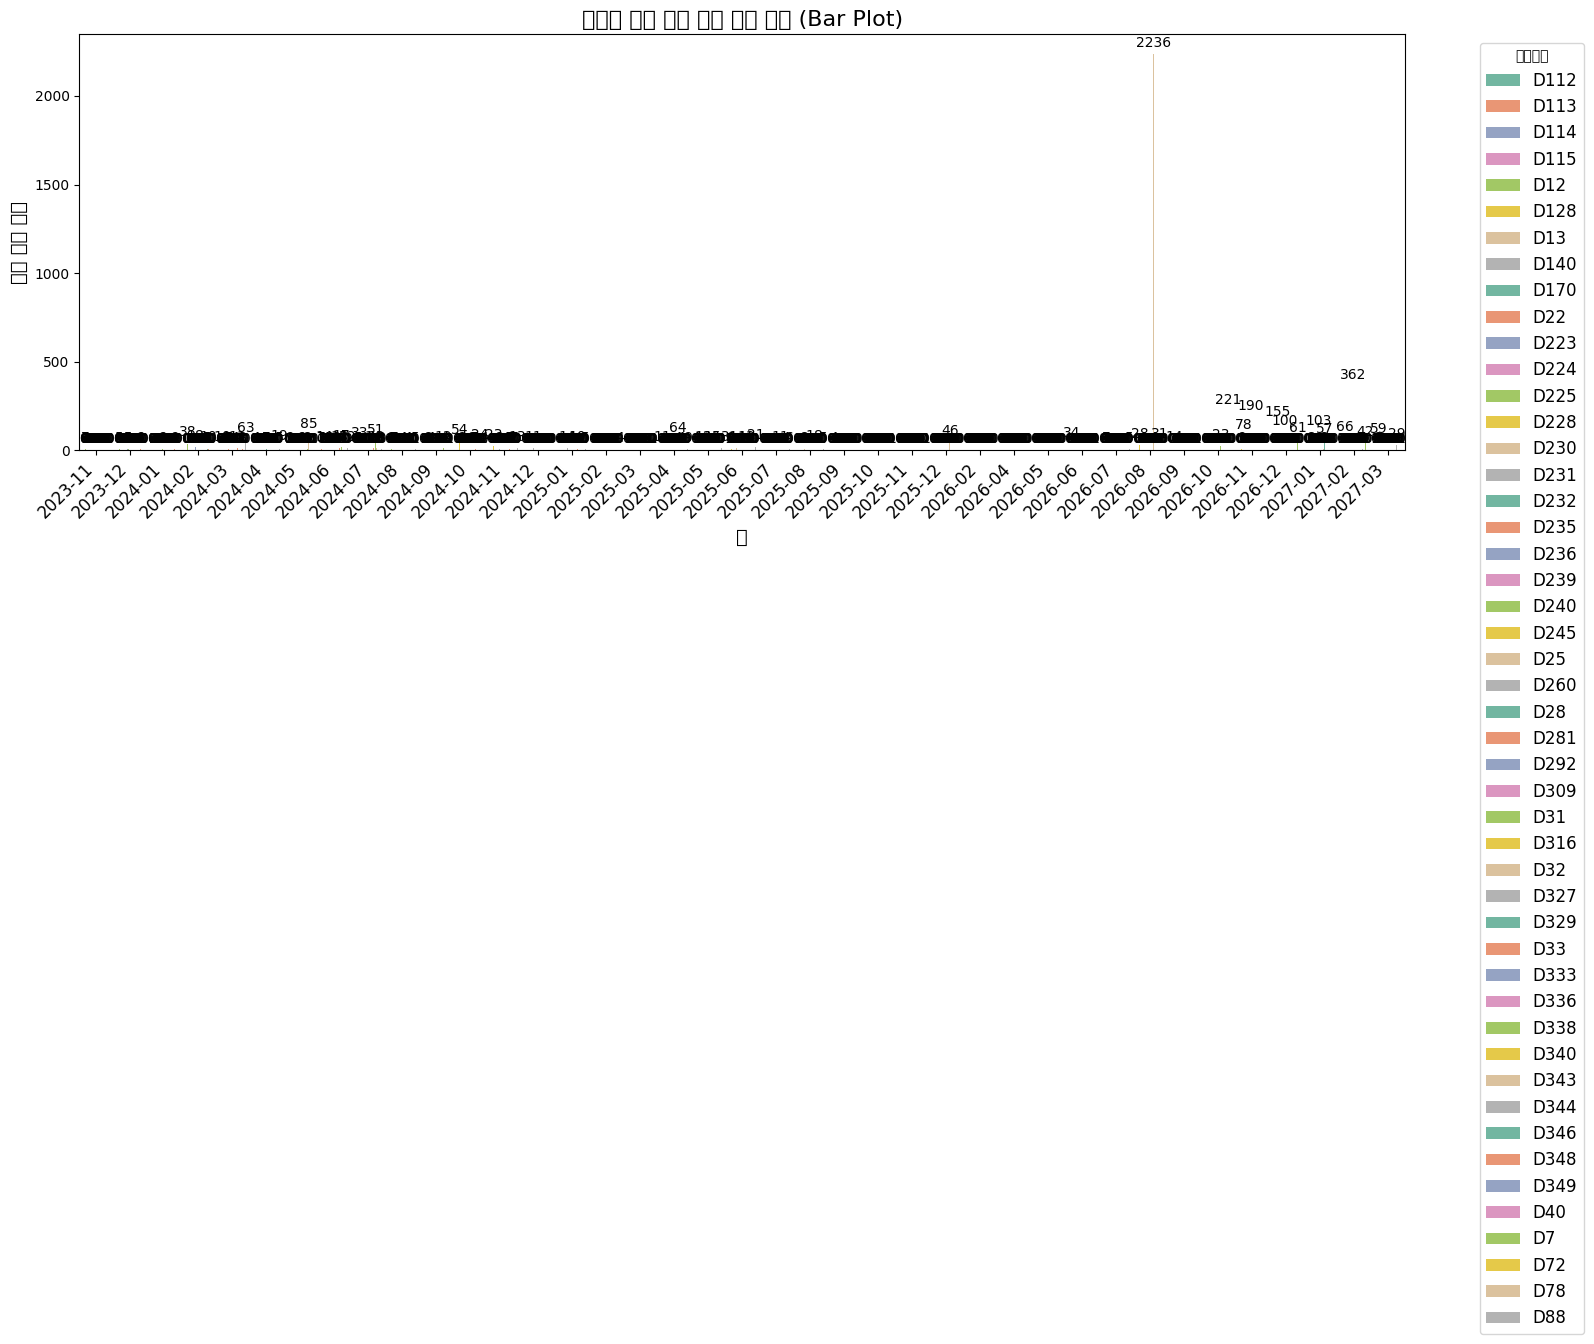

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to use for plotting
dept_issue_trend_reset = dept_issue_trend.reset_index()

# Melt the dataframe for easier plotting
dept_issue_trend_melted = dept_issue_trend_reset.melt(id_vars=['출도부서'], var_name='월', value_name='출도 요청 횟수')

plt.figure(figsize=(16, 10))

# Create the bar plot
ax = sns.barplot(data=dept_issue_trend_melted, x='월', y='출도 요청 횟수', hue='출도부서', palette='Set2')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

# Set axis labels and title
plt.xlabel('월', fontsize=14)
plt.ylabel('출도 요청 횟수', fontsize=14)
plt.title('부서별 월별 출도 요청 횟수 변화 (Bar Plot)', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust the legend
plt.legend(title='출도부서', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()


c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51229 (\N{HANGUL SYLLABLE JEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarn

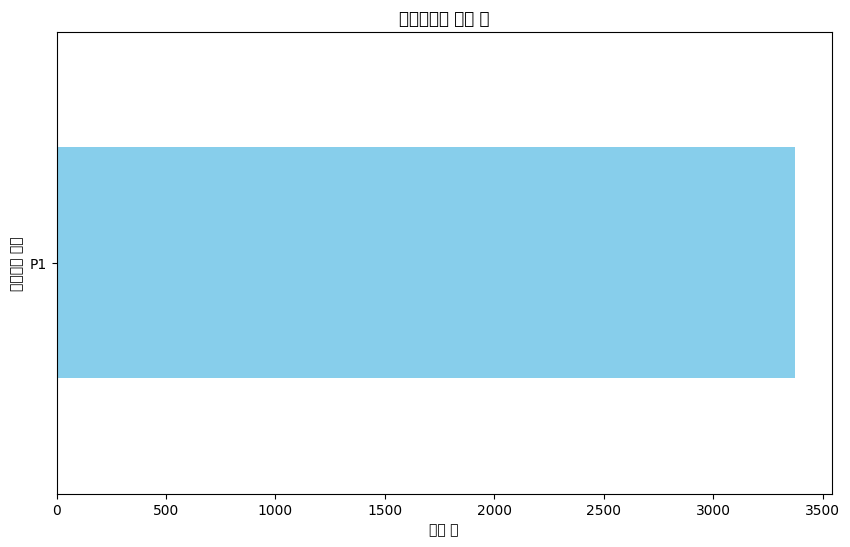

c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarni

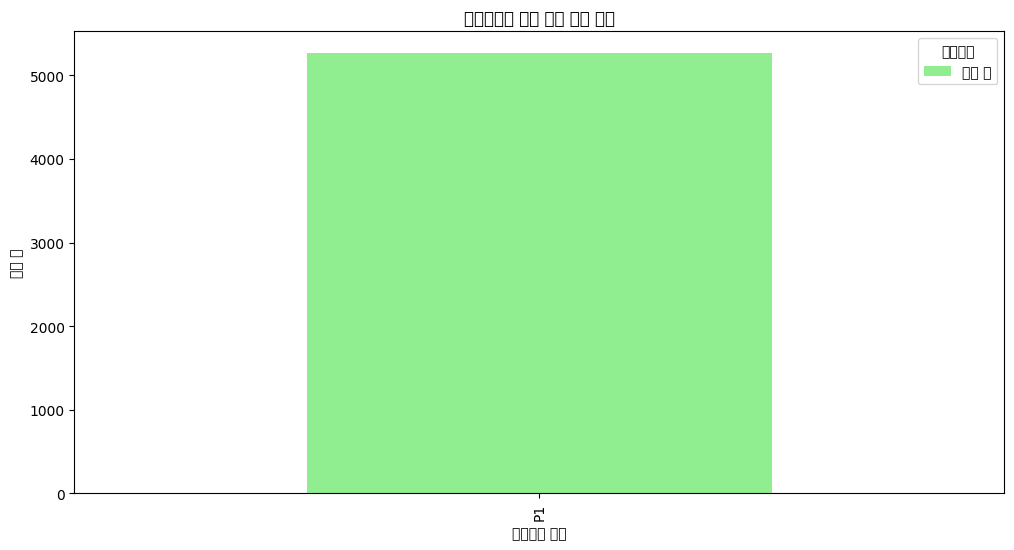

c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\samsung\Documents\GitHub\project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarni

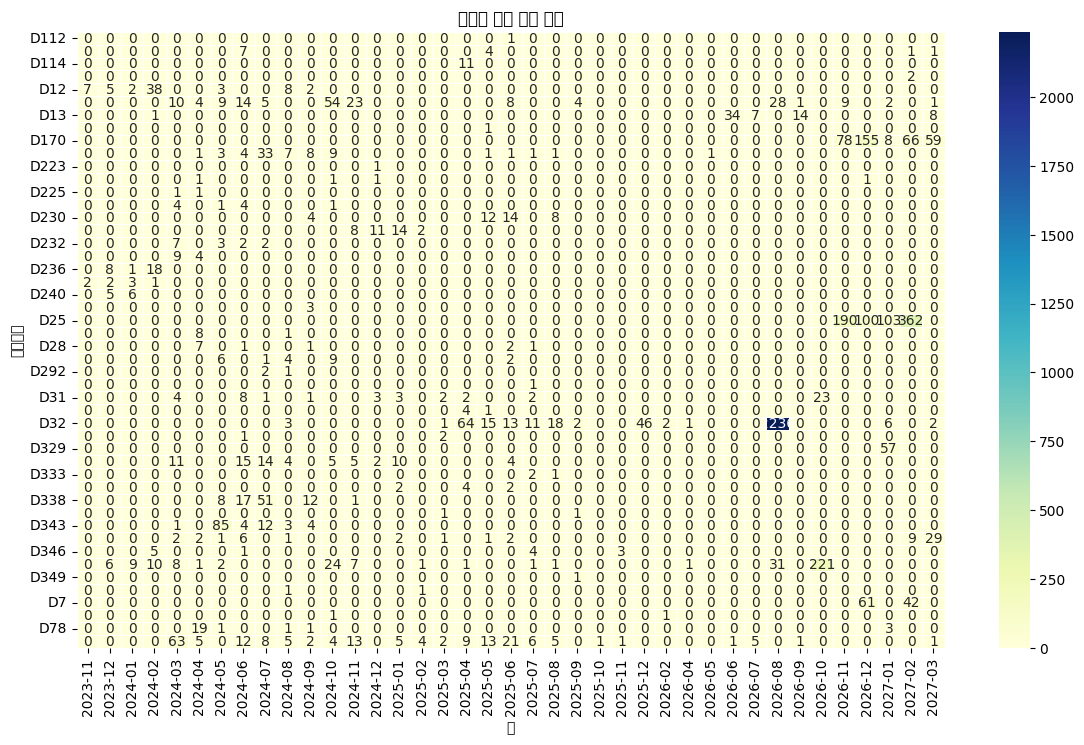

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 읽어서 DataFrame으로 저장 (필요한 인코딩으로 조정)
df = pd.read_csv('1_1.csv', encoding='euc-kr')

# 출도일자를 datetime 형식으로 변환
df['출도일자'] = pd.to_datetime(df['출도일자'])

# 프로젝트별 과제 수 분석
project_task_count = df.groupby('프로젝트번호')['과제번호'].nunique()

# 1. 프로젝트별 과제 수를 바 차트로 시각화
plt.figure(figsize=(10, 6))
project_task_count.sort_values().plot(kind='barh', color='skyblue')
plt.title('프로젝트별 과제 수')
plt.xlabel('과제 수')
plt.ylabel('프로젝트 번호')
plt.show()

# 진행상황 컬럼 생성 (출도일자 기준)
df['진행상황'] = df['출도일자'].apply(lambda x: '진행 중' if pd.notna(x) else '완료')

# 프로젝트별 전체 진행 상황
project_overall_status = df.groupby(['프로젝트번호', '진행상황']).size().unstack(fill_value=0)

# 2. 프로젝트별 전체 진행 상황을 쌓아 올린 바 차트로 시각화
project_overall_status.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightgreen', 'orange'])
plt.title('프로젝트별 전체 과제 진행 상황')
plt.xlabel('프로젝트 번호')
plt.ylabel('과제 수')
plt.legend(title='진행상황')
plt.show()

# 부서별 출도 패턴 분석 (월별로 집계)
dept_issue_trend = df.groupby(['출도부서', df['출도일자'].dt.to_period('M')]).size().unstack(fill_value=0)

# 3. 부서별 월별 출도 패턴을 히트맵으로 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(dept_issue_trend, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('부서별 월별 출도 패턴')
plt.xlabel('월')
plt.ylabel('출도부서')
plt.show()
